## 1. 날씨 데이터 다운로드 크롤링

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,UnexpectedAlertPresentException
import os
import time

In [3]:
chromeOptions = webdriver.ChromeOptions()
prefs = {"download.default_directory" : r"C:\Users\Administrator\2020빅콘\2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)\03_weather"}
chromeOptions.add_experimental_option("prefs",prefs)

chromedriver = r'C:\Users\Administrator\chromedriver'
browser = webdriver.Chrome(executable_path=chromedriver, chrome_options=chromeOptions)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [5]:
def login(id, pw):
    browser.get('https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1')
    
    login = browser.find_element_by_css_selector('#loginBtn')
    login.click()
    time.sleep(1.5)
    
    input_id = browser.find_element_by_css_selector('#loginId')
    input_id.send_keys(id)
    input_pw = browser.find_element_by_css_selector('#passwordNo')
    input_pw.send_keys(pw)
    
    login_click = browser.find_element_by_css_selector('#loginbtn')
    login_click.click()

In [24]:
def initial(link):
    browser.get('https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1')
    
     # 자료형태 -> 분자료로 클릭
    select_time = browser.find_element_by_xpath('//*[@id="dataFormCd"]/option[6]')
    select_time.click()
    time.sleep(1.5)

    # 년도 -> 2019년 선택
    select_year_from = browser.find_element_by_xpath('//*[@id="startDt"]/option[3]')
    select_year_from.click()
    select_year_to = browser.find_element_by_xpath('//*[@id="endDt"]/option[3]')
    select_year_to.click()
    time.sleep(1.5)

    # 지역 -> 전체 클릭
    select_area = browser.find_element_by_css_selector('#ztree_1_check')
    select_area.click()
    time.sleep(1.5)

    # 조회클릭
    final_click = browser.find_element_by_css_selector('#dsForm > div.btn-area.text-center > a')
    final_click.click()
    time.sleep(1.5)

In [ ]:
# 페이지 리스트
# '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li.active > a',
page_list = [
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(4) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(5) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(6) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(7) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(8) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(9) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(10) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(11) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li:nth-child(12) > a',
             '#content > div.content-body > div.boardWrap > div > div.pagination.pagination-small > ul > li.next_page > a']

while True:
    for page in page_list:
        try: 
            time.sleep(1)
            next_page = browser.find_element_by_css_selector(page)
            next_page.click()
            time.sleep(4)

            # 자료 전체클릭
            select_data = browser.find_element_by_css_selector('#checkAll')
            select_data.click()
            time.sleep(2) 

            # 다운로드 클릭
            download = browser.find_element_by_css_selector('#content > div.content-body > div.boardWrap > div > div.float-right > a')
            download.click()
            time.sleep(2.5)


            # 용도 클릭
            use = browser.find_element_by_css_selector('#reqstPurposeCd7')
            use.click()
            time.sleep(1)

            # 신청 클릭
            apply = browser.find_element_by_css_selector('#btnArea > input.btn.btn-primary')
            apply.click()
            time.sleep(2)
        except NoSuchElementException:
            break

## 2. 병합

In [4]:
import pandas as pd  
import numpy as np  
import glob  
import sys

from tqdm import tqdm
from tqdm import trange
weather_list = glob.glob(r'C:\Users\Administrator\2020빅콘\2020빅콘테스트 데이터_코드\weather\**\*.csv')
len(weather_list)

192

In [5]:
tot_sum = 0

#파일 Union  
all_data = pd.DataFrame()  
for f in tqdm(weather_list): 
    df = pd.read_csv(f, engine='python', encoding='cp949') 
    all_data = all_data.append(df, ignore_index=True)
    
    time.sleep(0.01)
    tot_sum += 1
print(tot_sum)

100%|████████████████████████████████████████████████████████████████████████████████| 192/192 [03:30<00:00,  1.25s/it]


192


In [7]:
all_data.to_csv('weather_data_all.csv', index = False)

## 3. 데이터 전처리

In [296]:
wea = pd.read_csv("weather_data_all.csv", engine='python', encoding = 'utf8')
len(wea)

8401889

In [297]:
wea.columns = ['지점','일시', '기온', '누적강수량', '풍향', '풍속', '현지기압', '해면기압', '습도', '일사', '일조']

In [298]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401889 entries, 0 to 8401888
Data columns (total 11 columns):
지점       int64
일시       object
기온       float64
누적강수량    float64
풍향       float64
풍속       float64
현지기압     float64
해면기압     float64
습도       float64
일사       float64
일조       float64
dtypes: float64(9), int64(1), object(1)
memory usage: 705.1+ MB


### 3.1 지점명 바꾸기

In [ ]:
## 도청, 도청이 없으면 인구가 많은 곳
# 108 서울
# 159 부산
# 143 대구
# 112 인천
# 156 광주
# 133 대전
# 152 울산
# 119 수원 -> 경기
# 101 춘천 -> 강원
# 131 청주 -> 충북
# 177 홍성 -> 충남
# 146 전주 -> 전북
# 174 순천 -> 전남
# 136 안동 -> 경북
# 155 창원 -> 경남 
# 184 제주

In [299]:
wea.지점.value_counts()

112    525599
108    525597
159    525593
155    525593
184    525588
152    525588
156    525575
101    525571
133    525560
177    525424
174    525322
131    525258
136    525192
146    525101
143    522888
119    522440
Name: 지점, dtype: int64

In [300]:
wea['지점'] = wea.지점.map({ 108 : '서울', 
                        159 : '부산', 
                        143 : '대구', 
                        112 : '인천', 
                        156: '광주', 
                        133: '대전', 
                        152: '울산',
                        119: '경기', 
                        101: '강원', 
                        131: '충북', 
                        177: '충남', 
                        146: '전북', 
                        174: '전남', 
                        136: '경북', 
                        155: '경남', 
                        184: '제주'})
wea.지점.value_counts()

인천    525599
서울    525597
경남    525593
부산    525593
제주    525588
울산    525588
광주    525575
강원    525571
대전    525560
충남    525424
전남    525322
충북    525258
경북    525192
전북    525101
대구    522888
경기    522440
Name: 지점, dtype: int64

### 3.2 일시 -> 날짜 형식으로 변환

In [301]:
wea['일시'] = pd.to_datetime(wea['일시'], format='%Y-%m-%d %H:%M', errors='raise')
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401889 entries, 0 to 8401888
Data columns (total 11 columns):
지점       object
일시       datetime64[ns]
기온       float64
누적강수량    float64
풍향       float64
풍속       float64
현지기압     float64
해면기압     float64
습도       float64
일사       float64
일조       float64
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 705.1+ MB


In [302]:
wea.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,1035.3,54.9,0.0,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,1035.3,55.0,0.0,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,1035.3,55.0,0.0,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,1035.3,55.2,0.0,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,1035.2,55.6,0.0,0.0


### 3.3 결측값 대치
- 강수량이 결측값이면 0
- 일사 결측값이면 0
- 일조 결측값이면 0

In [303]:
wea.isnull().sum()

지점            0
일시            0
기온         8795
누적강수량    208197
풍향        21036
풍속        15333
현지기압       8302
해면기압       8457
습도        12391
일사       577648
일조        10719
dtype: int64

#### 3.3.1 강수량

In [304]:
wea['누적강수량'] = wea.누적강수량.fillna(0)
wea.누적강수량.isnull().sum()

0

#### 3.3.2 일사

In [305]:
wea['일사'] = wea.일사.fillna(0)
wea.일사.isnull().sum()

0

#### 3.3.3 일조

In [306]:
wea['일조'] = wea.일조.fillna(0)
wea.일조.isnull().sum()

0

In [307]:
wea.isnull().sum()

지점           0
일시           0
기온        8795
누적강수량        0
풍향       21036
풍속       15333
현지기압      8302
해면기압      8457
습도       12391
일사           0
일조           0
dtype: int64

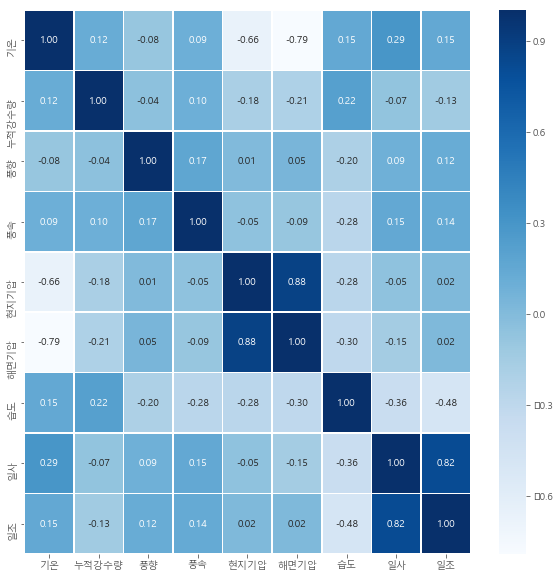

In [308]:
plt.figure(figsize=(10,10))
sns.heatmap(data = wea.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
## 상관관계 높은 조합: 기온&해면기압, 해면기압&현지기압, 일사&일조
# 해면기압 제외(기압이랑 현지기압이랑 상관관계 높음), 일조 제외(습도랑 상관관계)

In [309]:
wea.drop(['해면기압', '일조'], axis=1,inplace=True)
wea.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0


### 3.4 누적강수량 -> 강수량

In [310]:
wea1 = wea.copy()
wea1.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0


In [311]:
wea1['날짜'] = wea1['일시'].dt.date
wea1.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,날짜
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0,2019-01-01
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0,2019-01-01
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0,2019-01-01
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0,2019-01-01
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0,2019-01-01


In [312]:
wea1['누적강수량_shift'] = wea1.누적강수량.shift(-1)
wea1.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,날짜,누적강수량_shift
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0,2019-01-01,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0,2019-01-01,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0,2019-01-01,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0,2019-01-01,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0,2019-01-01,0.0


In [313]:
wea1['강수량'] = wea1['누적강수량_shift'] - wea1['누적강수량']
wea1.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,날짜,누적강수량_shift,강수량
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0,2019-01-01,0.0,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0,2019-01-01,0.0,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0,2019-01-01,0.0,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0,2019-01-01,0.0,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0,2019-01-01,0.0,0.0


In [314]:
wea1[wea1['강수량']<0] = 0
wea['강수량'] = wea1['강수량']
wea.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,강수량
0,서울,2019-01-01 00:01:00,-5.5,0.0,308.0,1.0,1024.1,54.9,0.0,0.0
1,서울,2019-01-01 00:02:00,-5.5,0.0,330.9,0.8,1024.1,55.0,0.0,0.0
2,서울,2019-01-01 00:03:00,-5.5,0.0,325.0,1.1,1024.1,55.0,0.0,0.0
3,서울,2019-01-01 00:04:00,-5.5,0.0,282.1,0.8,1024.1,55.2,0.0,0.0
4,서울,2019-01-01 00:05:00,-5.5,0.0,301.6,0.8,1024.0,55.6,0.0,0.0


In [315]:
wea.강수량.isnull().sum()

1

In [316]:
wea[wea['강수량'].isnull()]

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,강수량
8401888,강원,2020-01-01,-9.1,0.0,10.6,0.5,1024.0,66.0,9.93,NaN


In [317]:
wea[wea.강수량.isnull()] = 0
wea.강수량.isnull().sum()

0

In [318]:
wea.to_csv('weather_data_all_before_na.csv', encoding = 'utf8', index = False) 

R에서 mice로 결측값 대치 -> 파일이름: 1_4_날씨데이터_결측값대치

### 3.5 R에서 결측값 대치 후, 데이터 합치기

In [12]:
import glob  
import sys
import time

from tqdm import tqdm
from tqdm import trange
weather_list = glob.glob(r'C:\Users\Administrator\2020빅콘\2020빅콘테스트 데이터_코드\weather_predict\*.csv')
len(weather_list)

16

In [13]:
tot_sum = 0

#파일 Union  
all_data = pd.DataFrame()  
for f in tqdm(weather_list): 
    df = pd.read_csv(f, engine='python', encoding='cp949') 
    all_data = all_data.append(df, ignore_index=True)
    
    time.sleep(0.01)
    tot_sum += 1

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [02:26<00:00,  9.09s/it]


In [14]:
all_data.to_csv('weather_data_all_after_na.csv', index = False)

[최종 데이터]

In [38]:
### 최종 데이터 ###
wea = pd.read_csv('weather_data_all_after_na.csv', encoding = 'utf8')
wea.head()

,지점,일시,기온,누적강수량,풍향,풍속,현지기압,습도,일사,강수량
0,강원,2019-01-01 00:01:00,-9.7,0.0,0.0,0.0,1025.9,70.0,0.0,0.0
1,강원,2019-01-01 00:02:00,-9.7,0.0,283.0,0.4,1025.9,69.5,0.0,0.0
2,강원,2019-01-01 00:03:00,-9.7,0.0,289.0,0.6,1025.9,70.4,0.0,0.0
3,강원,2019-01-01 00:04:00,-9.8,0.0,290.1,0.5,1025.9,70.9,0.0,0.0
4,강원,2019-01-01 00:05:00,-9.8,0.0,306.6,0.3,1025.9,71.2,0.0,0.0


In [39]:
wea.drop('누적강수량', axis = 1, inplace = True)
wea.head()

,지점,일시,기온,풍향,풍속,현지기압,습도,일사,강수량
0,강원,2019-01-01 00:01:00,-9.7,0.0,0.0,1025.9,70.0,0.0,0.0
1,강원,2019-01-01 00:02:00,-9.7,283.0,0.4,1025.9,69.5,0.0,0.0
2,강원,2019-01-01 00:03:00,-9.7,289.0,0.6,1025.9,70.4,0.0,0.0
3,강원,2019-01-01 00:04:00,-9.8,290.1,0.5,1025.9,70.9,0.0,0.0
4,강원,2019-01-01 00:05:00,-9.8,306.6,0.3,1025.9,71.2,0.0,0.0


In [40]:
wea.to_csv('weather_data_all_after_na.csv', index = False)

In [19]:
wea = pd.read_csv('weather_df_(all).csv')
wea.head()

,지점,일시,기온,풍향,풍속,현지기압,습도,일사,강수량
0,강원,2019-01-01 00:01:00,-9.7,0.0,0.0,1025.9,70.0,0.0,0.0
1,강원,2019-01-01 00:02:00,-9.7,283.0,0.4,1025.9,69.5,0.0,0.0
2,강원,2019-01-01 00:03:00,-9.7,289.0,0.6,1025.9,70.4,0.0,0.0
3,강원,2019-01-01 00:04:00,-9.8,290.1,0.5,1025.9,70.9,0.0,0.0
4,강원,2019-01-01 00:05:00,-9.8,306.6,0.3,1025.9,71.2,0.0,0.0
